# R.R

### Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as nm 
import seaborn as sn #matamatical calculation


In [3]:
# impoted csv file in my dataframe
# Read the data set(there are two column age, bought insurance or not)
# import it into pandas data frame
df= pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Bought_Insurance')

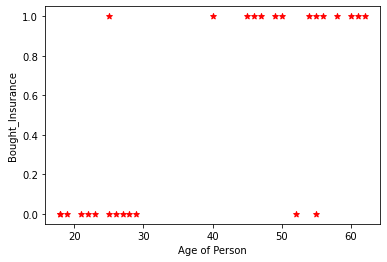

In [4]:
# Plotting aur data to see the data distribution
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')
plt.xlabel("Age of Person")
plt.ylabel("Bought_Insurance")

if person is younger he has not bought insurance but per more than 40 age has baught the insurence

In [5]:
df.shape

(27, 2)

We have 27 rows . we are going to split our data set into training set and test set

## Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Use train test split method to splt our data set  train_test_split
# That are thing get back result X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=train_test_split(df[["age"]],df.bought_insurance,test_size=0.2)

In [9]:
# these are data for testing
X_test.head(2)

,age
5,56
19,18


In [40]:
#theses data sample to tarin our model
X_train.head(3)

,age
11,28
17,58
20,21


In [10]:
y_train.head(3)


12    0
14    1
24    1
Name: bought_insurance, dtype: int64

In [11]:
y_test.head(2)

5     1
19    0
Name: bought_insurance, dtype: int64

In [43]:
# Import LogisticRegression for same linnearmodel
# LogisticRegression class imported
from sklearn.linear_model import LogisticRegression

In [44]:
# we are going to craete object for this class model to call the model
model = LogisticRegression()

### Traing our Model

In [45]:
# Now we are going to train our model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now it is ready to make prediction

In [46]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1], dtype=int64)

Younger age pepople  does not buying the insurence


In [47]:
# score showing the accuracy of the model
model.score(X_test,y_test)

0.8333333333333334

For smaller sample result will be accurate(bcoz small data size) but for larger data set we get error

In [49]:
# Probability it will buy insurence or not . 
#first column showwing probablity of buying insurence, 2nd column showing not buying insurence
model.predict_proba(X_test)

array([[0.57593105, 0.42406895],
       [0.89070456, 0.10929544],
       [0.37049068, 0.62950932],
       [0.39875516, 0.60124484],
       [0.29142244, 0.70857756],
       [0.08931898, 0.91068102]])

In [53]:
model.predict([[56]])

array([1], dtype=int64)

This working model is ready for prediction

###### **model.coef_ indicates value of m in y=m*x + b equation**

In [54]:
model.coef_

array([[0.11945775]])

###### model.intercept_ indicates value of b in y=m*x + b equation

In [55]:
model.intercept_

array([-5.08440188])

###### **Lets defined sigmoid function now and do the math with hand**

In [57]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [58]:
def pred_fun(age):
    z = 0.11945775*age-5.08440188
    y=sigmoid(z)
    return y

In [59]:
age= 45
pred_fun(45)

0.5722891212421257

**0.572 is greater than 0.5 which means person with 45 age will  buy insurance**

In [60]:
age = 25
pred_fun(25)

0.10929543860964865

**0.109 is lesser than 0.5 which means person with 45 age will *not* buy insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model